In [98]:
import numpy as np
from scipy.integrate import lebedev_rule
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [99]:
n = 25
x, w = lebedev_rule(n)
lebxvec = [0]*(3*len(x[0]))
for i in range(0, len(x[0])):
    for j in range(0, 3):
        lebxvec[3*i+j] = x[j][i]
        
file = f"lebedev_quad_{n}.txt"
with open(file, "w") as f:
    for dim in range(0,3):
        for i in range(0, len(x[dim])//5):
            f.write(f"{x[dim][5*i]:.16f},{x[dim][5*i+1]:.16f},{x[dim][5*i+2]:.16f},{x[dim][5*i+3]:.16f},{x[dim][5*i+4]:.16f},\n")
        f.write("\n")
    f.write("\n")
    for i in range(0, len(w)//5):
            f.write(f"{w[5*i]:.16f},{w[5*i+1]:.16f},{w[5*i+2]:.16f},{w[5*i+3]:.16f},{w[5*i+4]:.16f},\n")

In [100]:
def f(y):
    return numpy.exp(y[0])
ref = 14.7680137457653
sum = 0
for i in range(0, len(w)):
    y = [x[0][i], x[1][i], x[2][i]]
    sum = sum + w[i]*f(y)
print(numpy.abs(sum-ref))

2.1316282072803006e-14


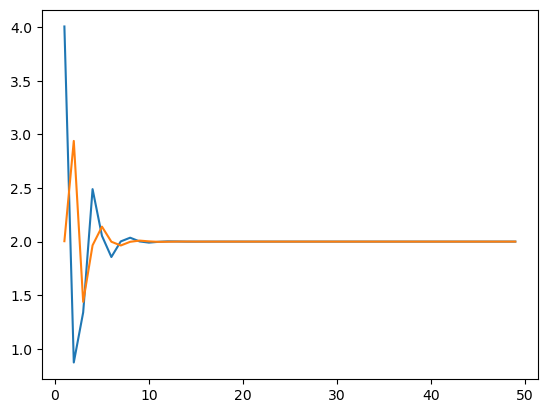

In [105]:
nvals = np.arange(1, 50)
I1vals = []
I2vals = []
for n in nvals:
    rm = 1.35
    def func(x):
        return numpy.exp(-x)
    
    # Chebyshev-Gauss, first kind
    I1 = 0
    for i in range(1,n+1):
        xi = np.cos((2*i-1)*np.pi/(2*n))
        wi = np.pi / n
        r = rm * (1+xi) / (1-xi)
        fi = (2/np.sqrt(1-xi**2))*func(r)*(r**3)
        I1 = I1 + wi * fi
    I1vals.append(I1)
    
    # Chebyshev-Gauss, second kind
    I2 = 0
    for i in range(1,n+1):
        xi = np.cos(i*np.pi/(n+1))
        wi = np.pi / (n+1) * np.sin(i*np.pi/(n+1))**2
        r = rm * (1+xi) / (1-xi)
        fi = (1/np.sqrt(1-xi**2) * r)**3 * 2 * func(r)
        I2 = I2 + wi * fi
    I2vals.append(I2)

plt.plot(nvals, I1vals)
plt.plot(nvals, I2vals)